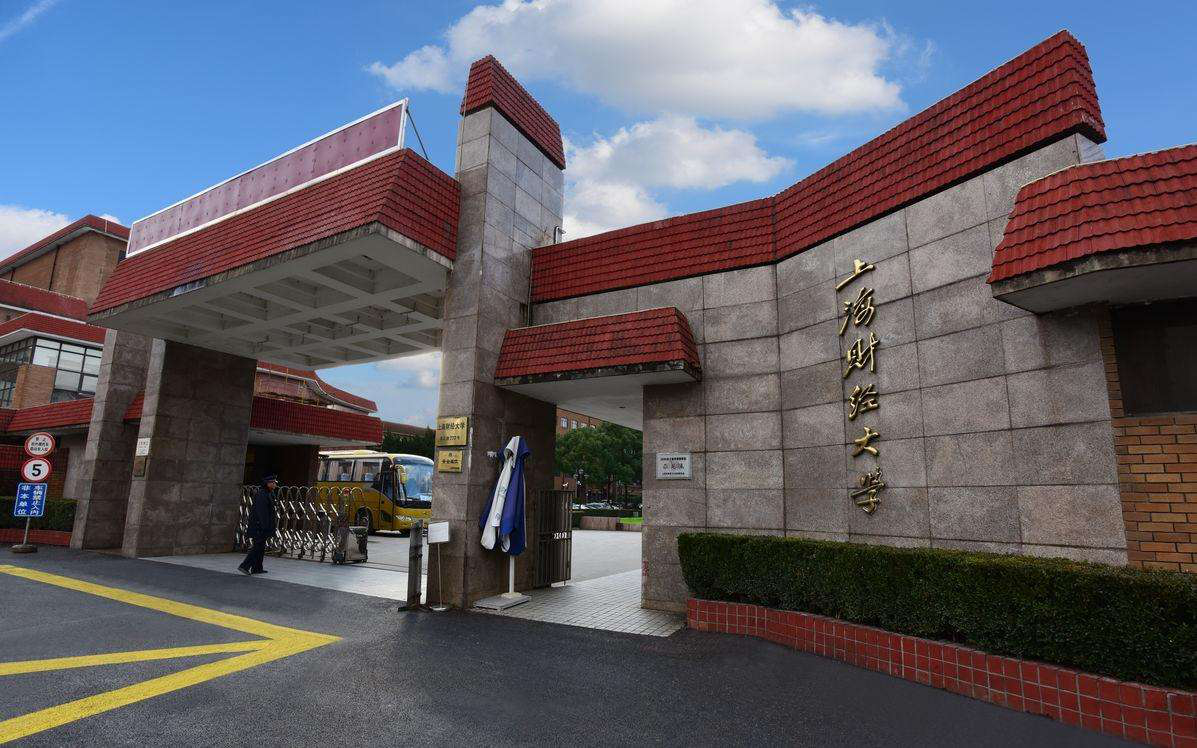

In [1]:
from PIL import Image
im = Image.open("sufe.jpg")
im

In [2]:
import numpy as np
im_arr = np.array(im)
print(im_arr.shape)

(748, 1197, 3)


In [3]:
print("Red channel:\n")
print(im_arr[:, :, 0])

print("\nGreen channel:\n")
print(im_arr[:, :, 1])

print("\nBlue channel:\n")
print(im_arr[:, :, 2])

Red channel:

[[68 69 70 ... 88 88 88]
 [68 69 71 ... 88 88 88]
 [69 70 71 ... 88 88 88]
 ...
 [95 68 84 ... 86 84 83]
 [87 65 75 ... 86 84 84]
 [83 67 70 ... 88 86 84]]

Green channel:

[[126 127 128 ... 138 138 138]
 [126 127 129 ... 138 138 138]
 [127 128 129 ... 138 138 138]
 ...
 [ 91  64  80 ...  31  34  36]
 [ 83  61  71 ...  31  34  36]
 [ 78  62  67 ...  31  34  36]]

Blue channel:

[[200 201 202 ... 209 209 209]
 [200 201 203 ... 209 209 209]
 [201 202 203 ... 209 209 209]
 ...
 [ 90  63  79 ...  24  25  26]
 [100  76  86 ...  24  25  26]
 [101  85  88 ...  22  23  24]]


In [4]:
# Convert to a grey image
# Use the formula in https://stackoverflow.com/a/12201744
# Y = 0.2989 R + 0.5870 G + 0.1140 B
im_grey = 0.2989 * im_arr[:, :, 0] + 0.5870 * im_arr[:, :, 1] + 0.1140 * im_arr[:, :, 2]
print(im_grey.shape)

(748, 1197)


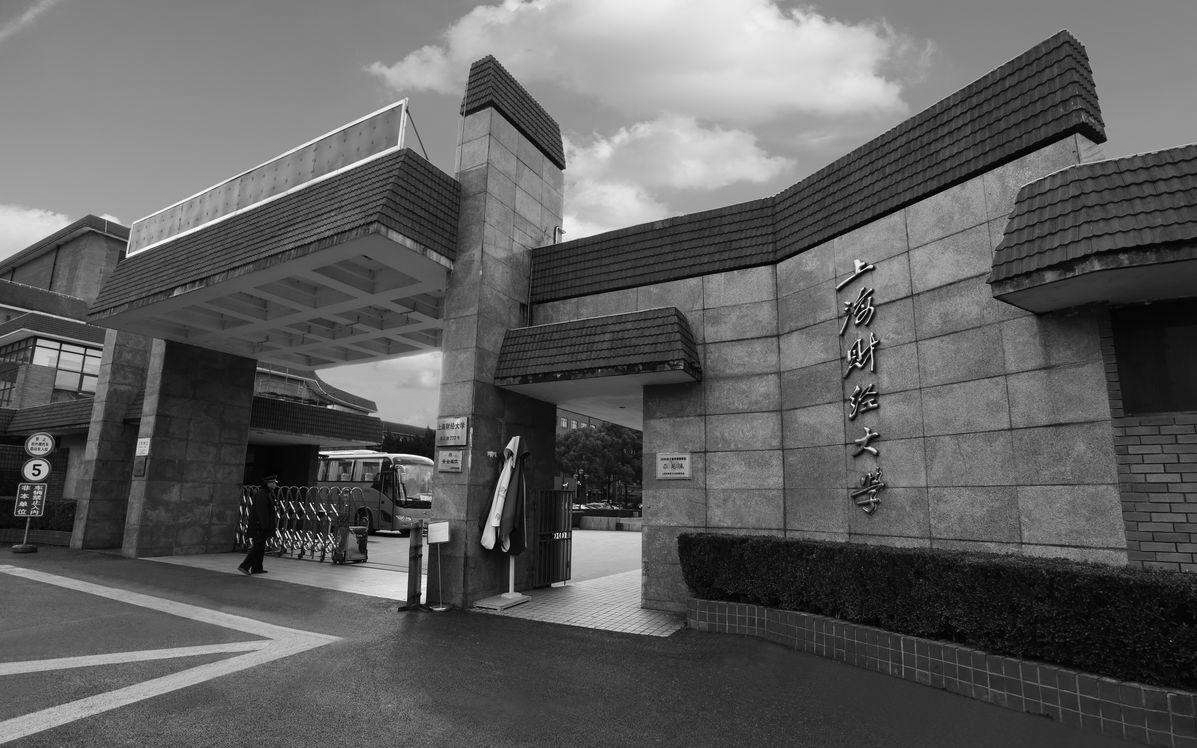

In [5]:
Image.fromarray(np.uint8(im_grey))

In [6]:
# The code is adapted from https://github.com/ashushekar/image-convolution-from-scratch
def convolve2d_channel(image, kernel):
    """
    This function takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flip(kernel, axis=(0, 1))
    # Various dimensions
    img_w = image.shape[1]
    img_h = image.shape[0]
    ker_w = kernel.shape[1]
    ker_h = kernel.shape[0]
    out_w = img_w - ker_w + 1
    out_h = img_h - ker_h + 1
    # Convolution output
    output = np.empty((out_h, out_w))
    # Loop over pixels
    for j in range(out_w):
        for i in range(out_h):
            output[i, j] = (kernel * image[i:(i + ker_h), j:(j + ker_w)]).sum()

    return output

def convolve2d(image, kernel):
    if image.ndim == 2:
        return convolve2d_channel(image, kernel)
    elif image.ndim == 3:
        res = [convolve2d_channel(image[:, :, k], kernel) for k in range(image.shape[2])]
        return np.stack(res, axis=2)
    else:
        raise Exception("invalid image shape")

In [7]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [8]:
im1 = convolve2d(im_grey, kernel)
im1.shape

(746, 1195)

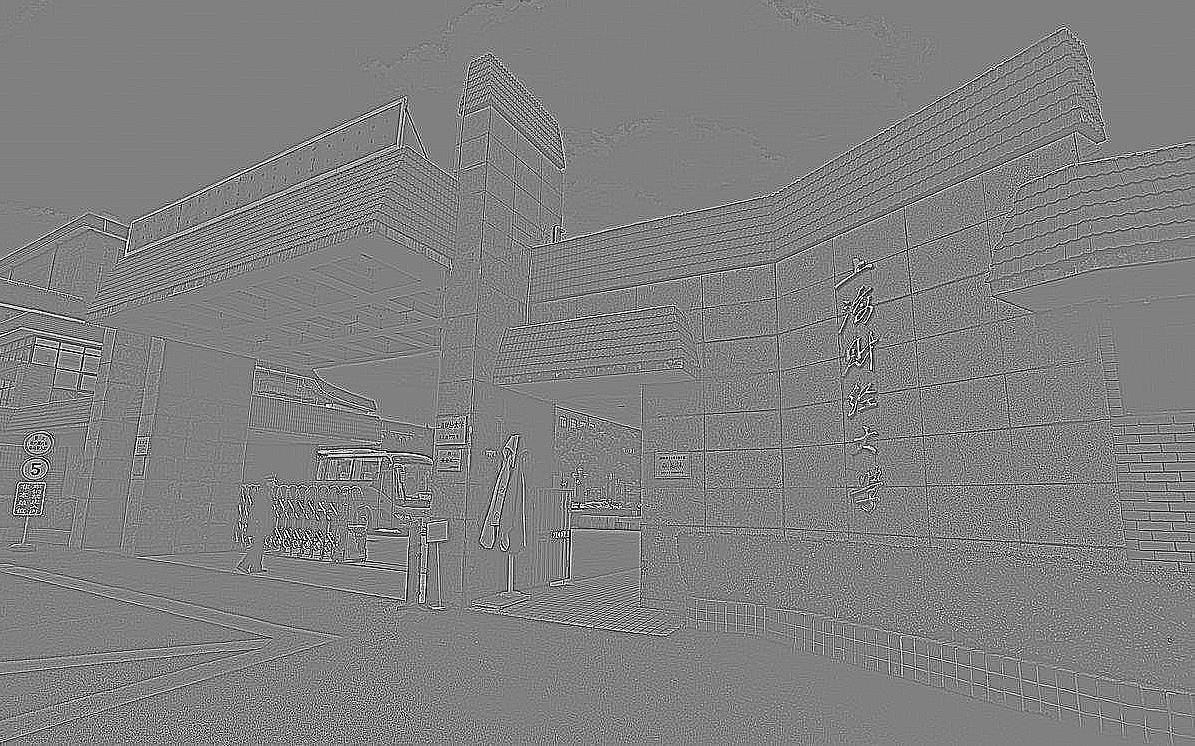

In [9]:
def normalize(x):
    xmin = np.quantile(x, 0.01)
    xmax = np.quantile(x, 0.99)
    x = np.clip(x, xmin, xmax)
    return np.uint8(255.0 * (x - xmin) / (xmax - xmin))

Image.fromarray(normalize(im1))

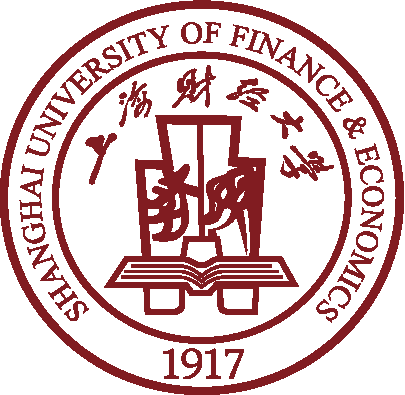

In [10]:
logo = Image.open("logo.png")
logo

(395, 405, 3)
(395, 405)


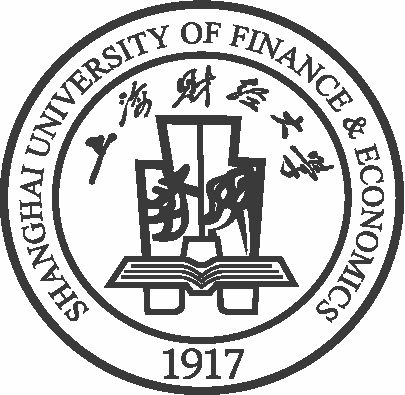

In [11]:
logo = np.array(logo)
print(logo.shape)
logo = 0.2989 * logo[:, :, 0] + 0.5870 * logo[:, :, 1] + 0.1140 * logo[:, :, 2]
print(logo.shape)
Image.fromarray(np.uint8(logo))

(393, 403)


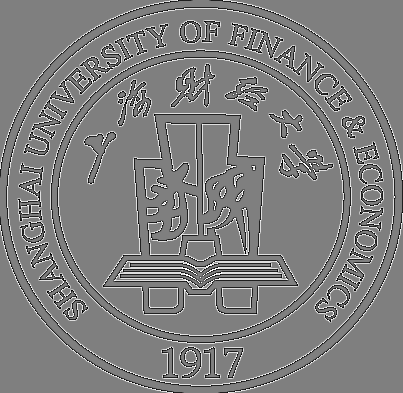

In [12]:
logo = convolve2d(logo, kernel)
print(logo.shape)
Image.fromarray(normalize(logo))

[[0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]
 [0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012]]


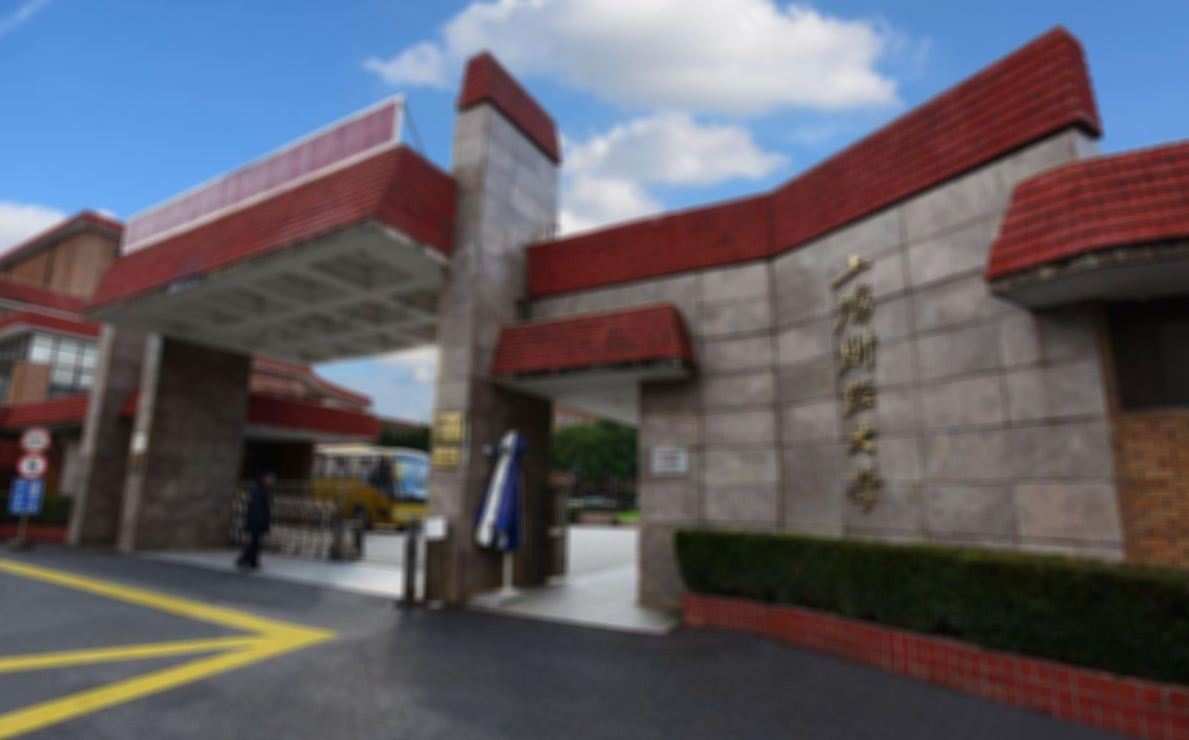

In [13]:
kernel = np.ones((9, 9)) / 81.0
print(np.round(kernel, 3))

im2 = convolve2d(im_arr, kernel)
Image.fromarray(np.uint8(im2))

[[0.001 0.002 0.004 0.006 0.006 0.006 0.004 0.002 0.001]
 [0.002 0.005 0.009 0.012 0.014 0.012 0.009 0.005 0.002]
 [0.004 0.009 0.016 0.022 0.024 0.022 0.016 0.009 0.004]
 [0.006 0.012 0.022 0.03  0.034 0.03  0.022 0.012 0.006]
 [0.006 0.014 0.024 0.034 0.038 0.034 0.024 0.014 0.006]
 [0.006 0.012 0.022 0.03  0.034 0.03  0.022 0.012 0.006]
 [0.004 0.009 0.016 0.022 0.024 0.022 0.016 0.009 0.004]
 [0.002 0.005 0.009 0.012 0.014 0.012 0.009 0.005 0.002]
 [0.001 0.002 0.004 0.006 0.006 0.006 0.004 0.002 0.001]]


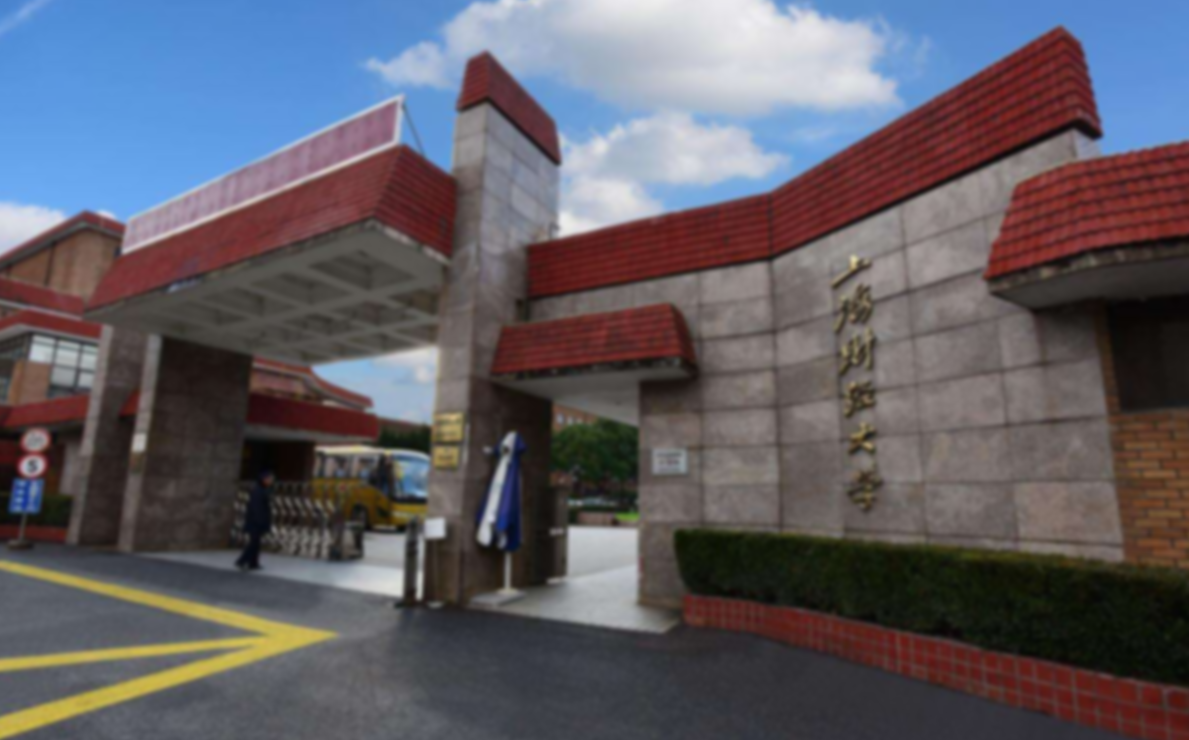

In [14]:
gr = np.linspace(-3, 3, num=9)
den = np.exp(-0.2 * gr * gr)
den = den.reshape(-1, 1) / den.sum()
kernel = den.dot(den.T)
print(np.round(kernel, 3))

im3 = convolve2d(im_arr, kernel)
Image.fromarray(np.uint8(im3))

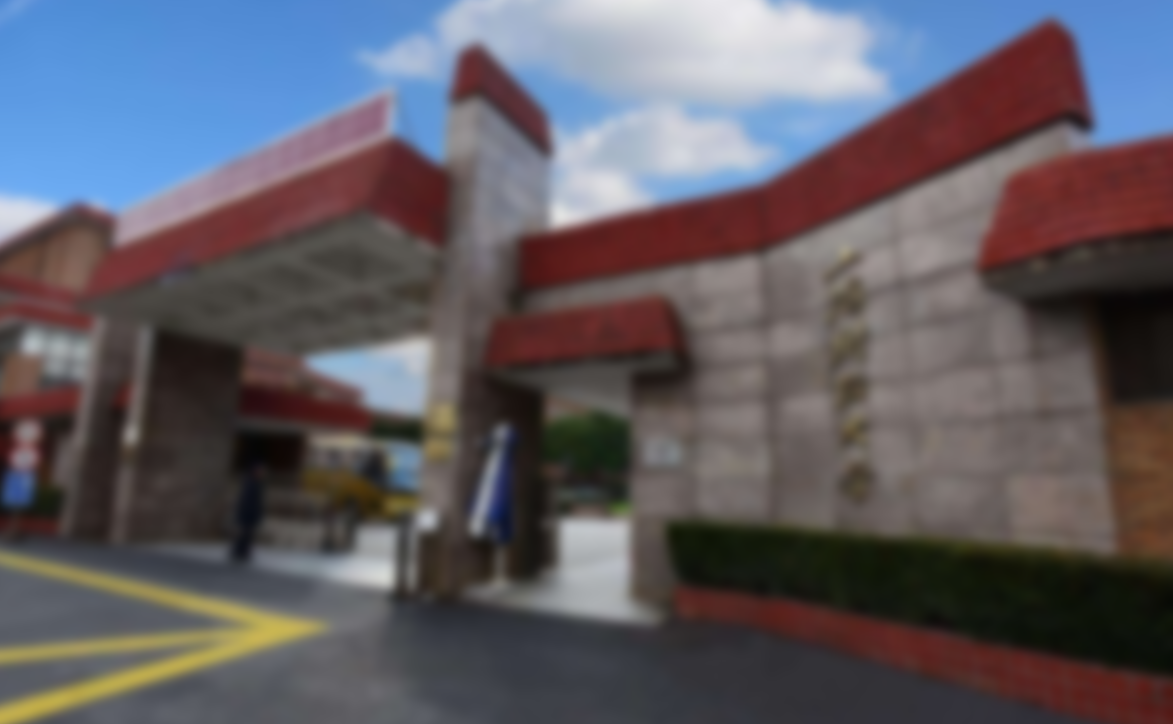

In [15]:
gr = np.linspace(-5, 5, num=25)
den = np.exp(-0.1 * gr * gr)
den = den.reshape(-1, 1) / den.sum()
kernel = den.dot(den.T)

im4 = convolve2d(im_arr, kernel)
Image.fromarray(np.uint8(im4))